<a href="https://colab.research.google.com/github/falloutdey/Atividade1_LLM_e_Estatistica/blob/main/Atividade1_LLM_e_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1: Z-score and Binomial Distribution

##A: Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

* Foi utilizado o dataset Titanic, disponível na biblioteca seaborn do Python. Esse conjunto de dados contém informações sobre os passageiros do navio Titanic, incluindo variáveis demográficas e socioeconômicas, assim como a informação sobre quem sobreviveu ao naufrágio. A variável alvo do conjunto de dados é “survived”, que representa duas classes: passageiros que sobreviveram e passageiros que não sobreviveram.

* Para análise, eu escolhi duas features numéricas: idade (age) e tarifa (fare). Eu escolhi essas duas porque faz sentido imaginar que pessoas com condições melhores (que pagaram tarifas maiores) podem ter tido mais chances de sobreviver, e a idade também pode influenciar. Então vale a pena ver como esses valores se distribuem entre quem sobreviveu e quem não sobreviveu. Depois disso, eu fiz dois conjuntos de histogramas.


###Histograma 1 (10 bins):

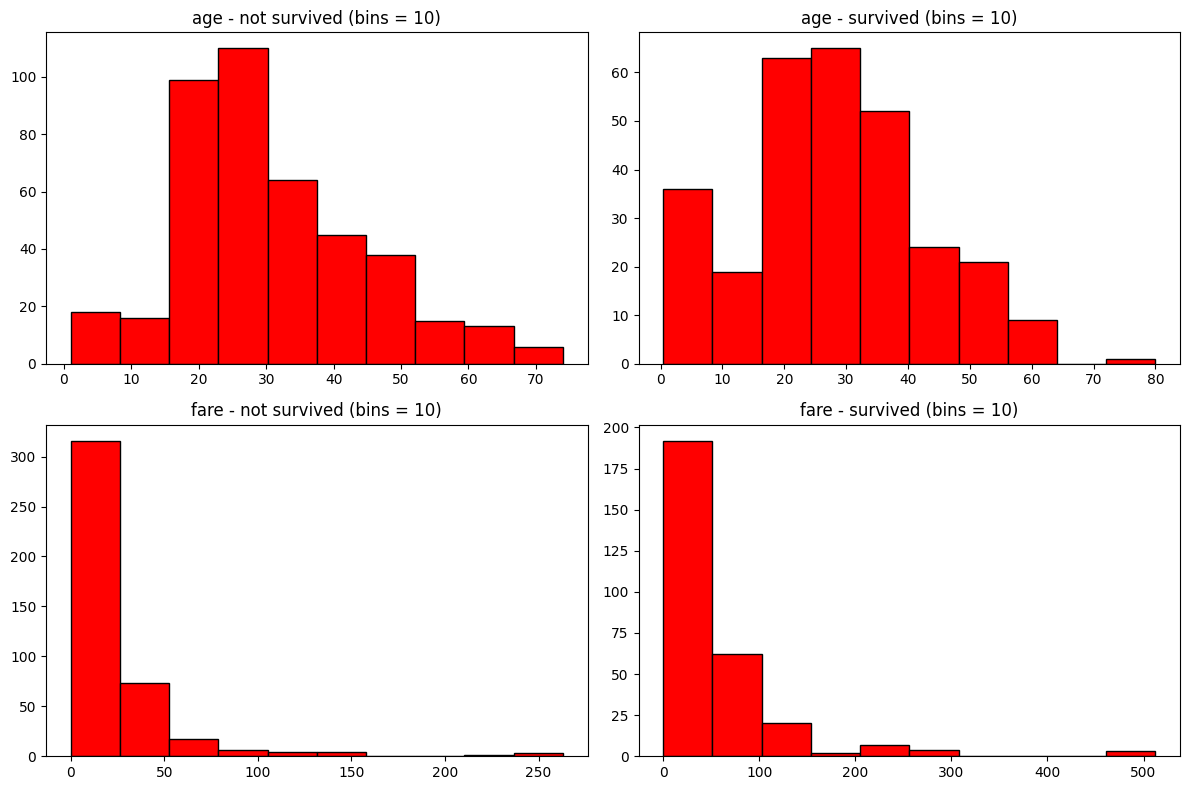

In [ ]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#Inserção dos Dados
dados = sb.load_dataset("titanic")
dados = dados[["age", "fare", "survived"]].dropna()
dados["survived"] = dados["survived"].map({0: "not survived", 1: "survived"})

#Definição de Classes e Features
classes = ["not survived", "survived"]
features = ["age", "fare"]

#Gráfico
fig, matriz = plt.subplots(2, 2, figsize = (12, 8))

for i, feat in enumerate(features):
  for j, classe in enumerate(classes):
    dadosFinais = dados[dados["survived"] == classe][feat]
    matriz[i][j].hist(dadosFinais, bins=10, color="red", edgecolor="black")
    matriz[i][j].set_title(f"{feat} - {classe} (bins = 10)")

plt.tight_layout()
plt.show()

* No primeiro eu usei 10 bins, que servem para ter uma visão mais geral dos dados. Com essa quantidade, dá para perceber padrões mais amplos, como faixas de idade mais presentes em cada classe ou os valores médios de tarifa. A visualização fica mais simples, mesmo que a gente perca alguns detalhes.

###Histograma 2 (30 bins):

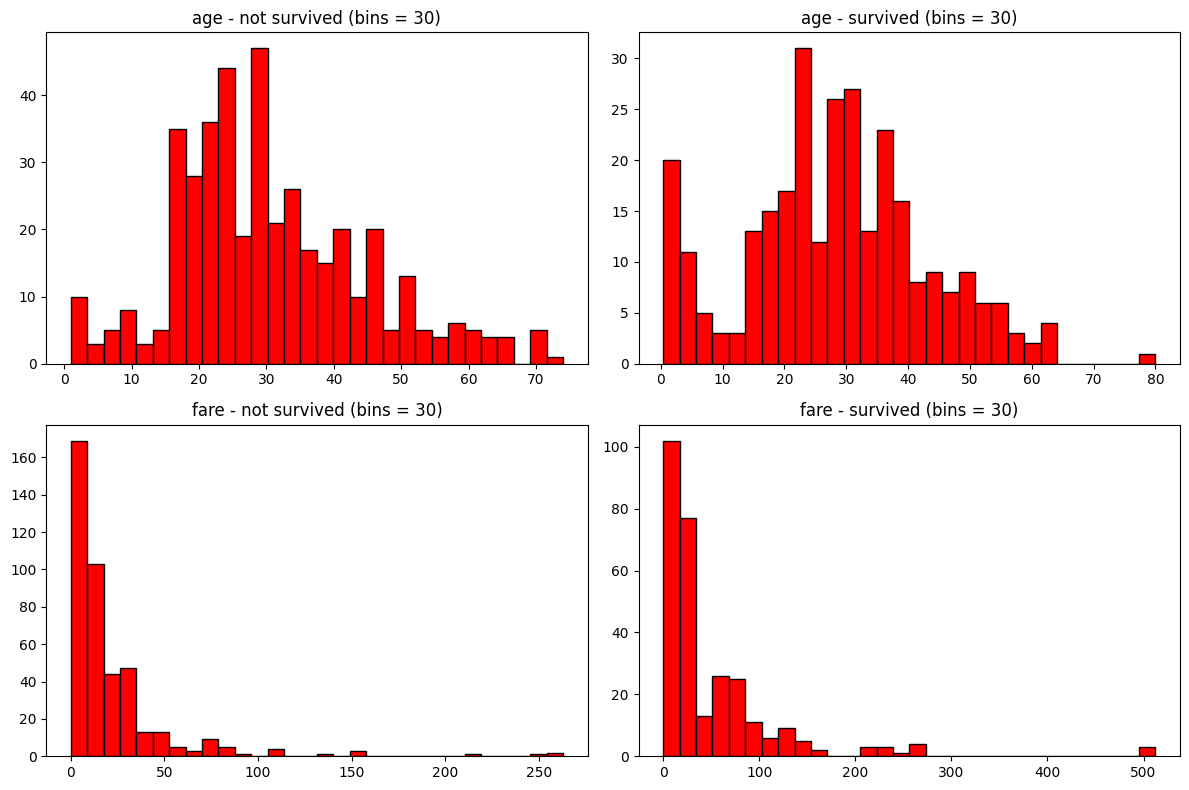

In [ ]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#Inserção dos Dados
dados = sb.load_dataset("titanic")
dados = dados[["age", "fare", "survived"]].dropna()
dados["survived"] = dados["survived"].map({0: "not survived", 1: "survived"})

#Definição de Classes e Features
classes = ["not survived", "survived"]
features = ["age", "fare"]

#Gráfico
fig, matriz = plt.subplots(2, 2, figsize = (12, 8))

for i, feat in enumerate(features):
  for j, classe in enumerate(classes):
    dadosFinais = dados[dados["survived"] == classe][feat]
    matriz[i][j].hist(dadosFinais, bins=30, color="red", edgecolor="black")
    matriz[i][j].set_title(f"{feat} - {classe} (bins = 30)")

plt.tight_layout()
plt.show()

* No segundo histograma eu usei 30 bins, para deixar mais detalhado e enxergar melhor certas regiões do gráfico. Nesse caso, algumas diferenças aparecem mais claramente, mas o gráfico também fica mais “picado”. Ou seja, quando a gente aumenta muito a quantidade de bins, acaba ficando mais difícil interpretar, porque pode aparecer muito ruído e detalhes que nem sempre significam alguma coisa.

* Pensando em aprendizado de máquina, os histogramas ajudam a perceber se essas duas variáveis realmente diferenciam as classes. Por exemplo, em “fare” dá para ver que os passageiros que pagaram valores mais altos geralmente sobreviveram mais, então essa feature pode ser útil num modelo de classificação. Já idade parece mais parecida entre as duas classes, então talvez não seja tão forte isoladamente.

##B: Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho. Use uma função de Python e uma tabela para obter os valores de probabilidade.


* Escolhi a variável “fare”, que representa o valor da tarifa paga pelos passageiros. A ideia foi analisar como essa variável se comporta e usar uma distribuição normal para aproximar os dados. Esse estudo pode ajudar a entender se um valor pago é alto, baixo ou comum dentro do conjunto de dados.

* A primeira etapa foi gerar dados artificiais parecidos com os do Titanic. Para isso, eu calculei a média e o desvio padrão da coluna fare do dataset real. Esses valores são usados dentro da função np.random.normal, que gera números com comportamento parecido com o original. Assim, eu simulei 500 valores que seguem uma forma próxima da distribuição real da tarifa. Em seguida, eu fiz um histograma desses dados e coloquei por cima a curva da distribuição normal usando a função norm.pdf. A ideia dessa etapa é visualizar se os dados simulados seguem o formato esperado da normal. Isso começa a conectar teoria com prática, porque conseguimos comparar a forma real do histograma com o formato teórico da distribuição normal.

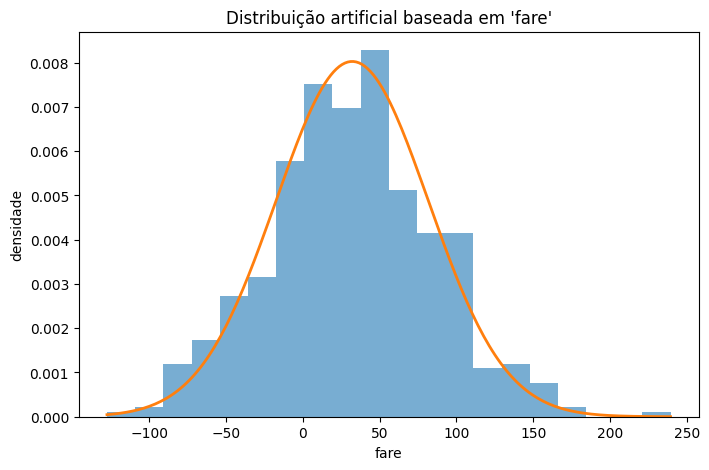

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sb

#Inserção dos Dados
dados = sb.load_dataset("titanic")
dados = dados["fare"].dropna()

#Calcular média e desvio padrão
media = dados.mean()
sigma = dados.std()

#Gerando valores artificiais com base nos valores reais
dadosArtificiais = np.random.normal(media, sigma, 500)

#Histograma
plt.figure(figsize = (8,5))
plt.hist(dadosArtificiais, bins=20, density=True, alpha=0.6)
x = np.linspace(min(dadosArtificiais), max(dadosArtificiais), 200)
pdf = norm.pdf(x, media, sigma)
plt.plot(x, pdf, linewidth = 2)

plt.title("Distribuição artificial baseada em 'fare'")
plt.xlabel("fare")
plt.ylabel("densidade")
plt.show()

* Depois disso, defini dois valores para estudo: 20 e 100. O primeiro estudo foi calcular a probabilidade de alguém pagar menos que 20, usando a função de distribuição acumulada da normal. Como esse valor é menor do que a média da tarifa, era de se esperar que a probabilidade fosse mais alta. Em seguida, fiz o cálculo padronizado usando o Z-score, aplicando a fórmula (valor – média) dividido pelo desvio padrão. Com esse novo valor, calculei novamente a probabilidade e eles ficaram praticamente iguais, o que confirma que a padronização mantém a mesma probabilidade.

* O segundo estudo foi parecido, só que agora com o valor 100, para calcular a probabilidade de um passageiro pagar mais do que isso. Como esse valor está bem acima da média, a probabilidade apareceu bem menor, o que faz sentido porque poucas pessoas pagaram tarifas tão altas. Assim como no primeiro caso, repeti o cálculo usando o valor padronizado e comparei os dois resultados. A diferença entre eles praticamente não existe, o que confirma que tanto o cálculo direto quanto o cálculo usando Z representam a mesma área da curva normal, mudando apenas a escala.

* Por fim, fiz um gráfico da distribuição normal padrão, marcando no eixo horizontal os valores de Z encontrados para cada estudo. No gráfico dá para visualizar onde cada valor está localizado em relação ao centro da curva, onde ficam os valores mais comuns. O valor 20 aparece mais próximo do centro, enquanto o valor 100 fica mais distante, o que faz sentido com a interpretação de que pagar menos que 20 é mais comum e pagar mais de 100 é mais raro.

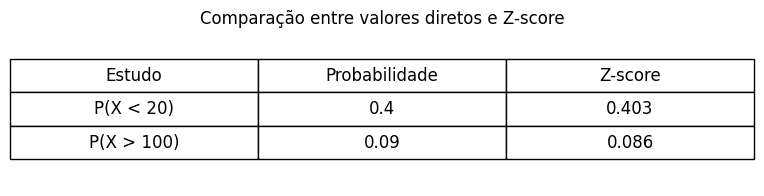

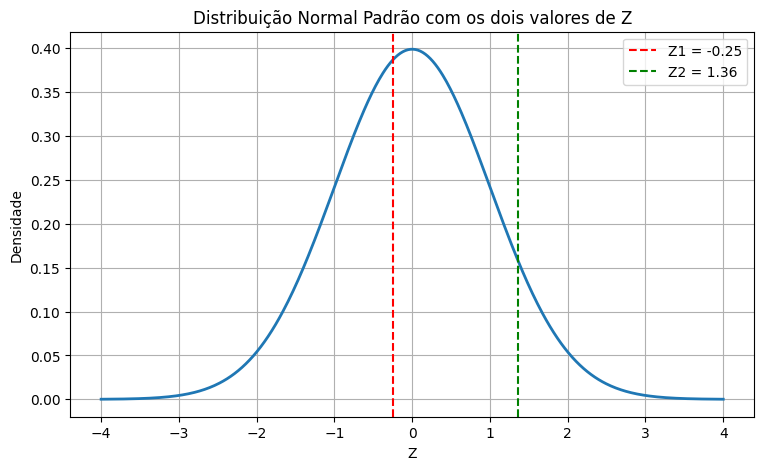

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sb

#Inserção dos Dados
dados = sb.load_dataset("titanic")
dados = dados["fare"].dropna()

#Calcular média e desvio padrão
media = dados.mean()
sigma = dados.std()

#Estudo 1
valor1 = 20
p1 = norm.cdf(valor1, media, sigma)
z1 = (valor1 - media) / sigma
p1_z = norm.cdf(z1)

#Estudo 2
valor2 = 100
p2 = 1 - norm.cdf(valor2, media, sigma)
z2 = (valor2 - media) / sigma
p2_z = 1 - norm.cdf(z2)

#Tabela
df = pd.DataFrame({"Estudo" : ["P(X < 20)", "P(X > 100)"], "Probabilidade" : [round(p1, 2), round(p2,2)], "Z-score": [round(p1_z,3), round(p2_z,3)]})

fig, ax = plt.subplots(figsize=(8,2))
ax.axis('off')
tabela = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
tabela.scale(1.2,2)
tabela.auto_set_font_size(False)
tabela.set_fontsize(12)
plt.title("Comparação entre valores diretos e Z-score")
plt.show()

# Gráfico
z_axis = np.linspace(-4, 4, 500)
normal_padrao = norm.pdf(z_axis)

plt.figure(figsize=(8.83,5))
plt.plot(z_axis, normal_padrao, linewidth=2)
plt.grid(True)

plt.axvline(z1, color="red", linestyle="--", label=f"Z1 = {round(z1,2)}")
plt.axvline(z2, color="green", linestyle="--", label=f"Z2 = {round(z2,2)}")

plt.title("Distribuição Normal Padrão com os dois valores de Z")
plt.xlabel("Z")
plt.ylabel("Densidade")
plt.legend()
plt.show()

##C: Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

#Parte 2: Sample Distribution and Sampling Distribution, TLC and P-value

##A: Sample Distribution and Sampling Distribution
##A partir do que foi feito na Atividade 2 “Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho”, crie  uma população artificial dessa variável com uma distribuição Gaussiana e demonstre sample distribution and sampling distribution. Faça avaliações de probabilidade de possíveis eventos.

* Para esta atividade, escolhi a variável fare do dataset Titanic, utilizado anteriormente, e que representa o valor da passagem paga pelos passageiros.
* Primeiro, usei os valores reais de fare para calcular a média e o desvio padrão. Com esses dados, criei uma população artificial de 1.000 passageiros, simulando os valores de tarifas com uma distribuição parecida com a original. Plotei um histograma para visualizar como os valores estão distribuídos.
* Depois, selecionei uma amostra de 50 passageiros dessa população e plotei o histograma da amostra. Isso ajuda a ver como os valores de uma amostra podem variar em relação à população. Em seguida, gerei 1.000 amostras de 50 passageiros cada para criar a distribuição amostral da média. Essa distribuição mostra como a média das amostras se comporta, dando uma ideia de como ela varia de acordo com o tamanho da amostra.
* Por fim, calculei algumas estatísticas e probabilidades: A média da distribuição amostral e o erro padrão (quanto a média das amostras tende a variar) e a probabilidade de um passageiro pagar menos de 20, entre 20 e 60, ou mais de 100. Os resultados foram organizados em dois quadros: um com as estatísticas da distribuição amostral e outro com as probabilidades dos eventos.

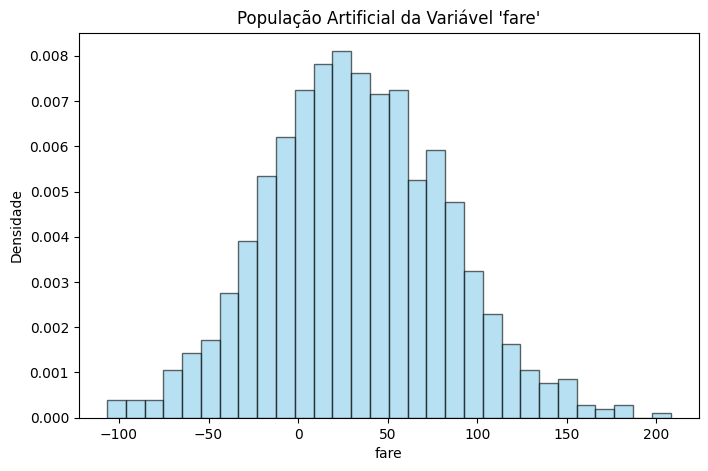

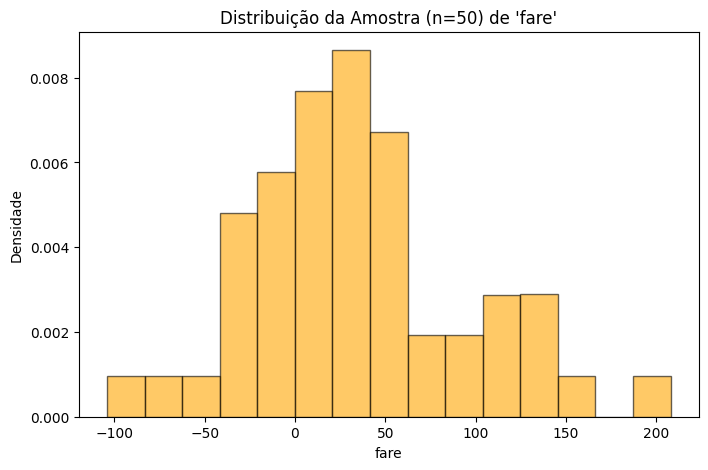

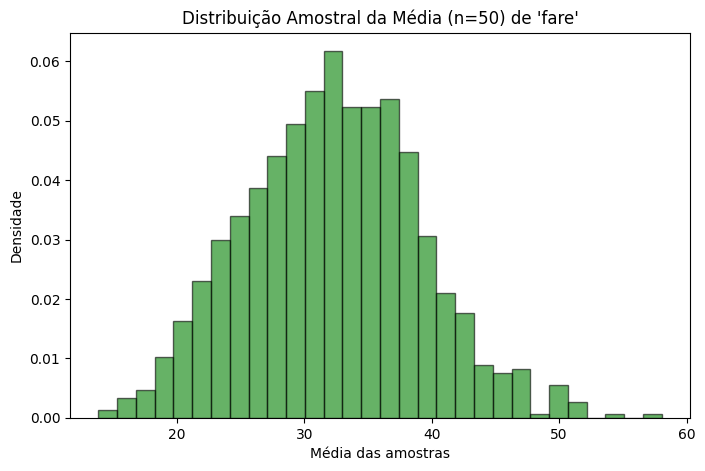

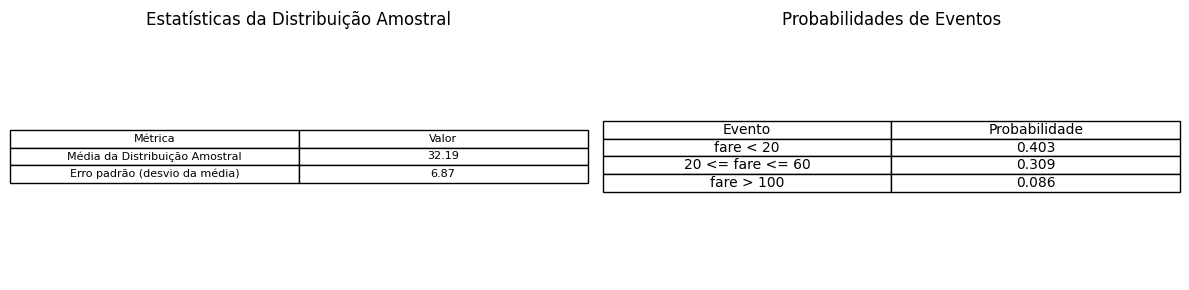

In [13]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sb

#Inserção dos Dados
dados = sb.load_dataset("titanic")
dados = dados["fare"].dropna()

#Calcular média e desvio padrão
media = dados.mean()
sigma = dados.std()

#População Artificial
tamanhoPopulacao = 1000
populacao = np.random.normal(media, sigma, tamanhoPopulacao)

plt.figure(figsize=(8,5))
plt.hist(populacao, bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black")
plt.title("População Artificial da Variável 'fare'")
plt.xlabel('fare')
plt.ylabel('Densidade')
plt.show()

#Sample Distribution
n = 50
amostra = np.random.choice(populacao, size=n, replace=False)

plt.figure(figsize=(8,5))
plt.hist(amostra, bins=15, density=True, alpha=0.6, color='orange', edgecolor='black')
plt.title("Distribuição da Amostra (n=50) de 'fare'")
plt.xlabel("fare")
plt.ylabel("Densidade")
plt.show()

#Sampling Distribution
numeroAmostras = 1000
media_amostra = [np.mean(np.random.choice(populacao, size=n, replace=False)) for _ in range(numeroAmostras)]

plt.figure(figsize=(8,5))
plt.hist(media_amostra, bins=30, density=True, alpha=0.6, color='green', edgecolor='black')
plt.title("Distribuição Amostral da Média (n=50) de 'fare'")
plt.xlabel("Média das amostras")
plt.ylabel("Densidade")
plt.show()

#Estatísticas da distribuição amostral
media_amostral_valor = np.mean(media_amostra)
erro_padrao = np.std(media_amostra)

#Probabilidades de eventos
eventos = {
    "fare < 20": (None, 20),
    "20 <= fare <= 60": (20, 60),
    "fare > 100": (100, None)
}

resultados = []
for nome, (baixo, alto) in eventos.items():
    if baixo is None:
        p = norm.cdf(alto, media, sigma)
    elif alto is None:
        p = 1 - norm.cdf(baixo, media, sigma)
    else:
        p = norm.cdf(alto, media, sigma) - norm.cdf(baixo, media, sigma)
    resultados.append([nome, round(p, 3)])

#Criar DataFrames para exibir em quadros
df_resultados = pd.DataFrame(resultados, columns=["Evento", "Probabilidade"])
df_estatisticas = pd.DataFrame([["Média da Distribuição Amostral", round(media_amostral_valor, 2)], ["Erro padrão (desvio da média)", round(erro_padrao, 2)]], columns=["Métrica", "Valor"])

#Mostrar quadros usando matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12,3))

ax[0].axis('off')
ax[0].table(cellText=df_estatisticas.values, colLabels=df_estatisticas.columns, cellLoc='center', loc='center')
ax[0].set_title("Estatísticas da Distribuição Amostral")

ax[1].axis('off')
ax[1].table(cellText=df_resultados.values, colLabels=df_resultados.columns, cellLoc='center', loc='center')
ax[1].set_title("Probabilidades de Eventos")

plt.tight_layout()
plt.show()

##B: TLC
##Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

* Para esse estudo, foi pedido que utilizasse a distribuição Gama, que é assimétrica, para criar uma população artificial, diante disso, escolhi criar 10.000 valores. Depois, fiz 1.000 amostras para quatro tamanhos diferentes: 10, 30, 50 e 100 elementos. Para cada amostra, calculei a média e olhei como essas médias se distribuem. O objetivo era ver como a forma da distribuição das médias muda e como a variabilidade diminui conforme aumentamos o tamanho da amostra.
* Com amostras pequenas (n=10), a distribuição das médias ainda carrega um pouco da assimetria da população original. As barras do histograma não se encaixam perfeitamente na curva normal, e a dispersão das médias é grande (variando aproximadamente de 2,0 a 7,5).
* Com amostras maiores (n=30), a assimetria já diminui bastante. O formato de sino começa a aparecer, mostrando que mesmo com 30 elementos a média amostral começa a se comportar como uma normal.
* Com n=50 e n=100, a distribuição das médias fica quase perfeita. A simetria é clara e a dispersão diminui muito. No caso de n = 100, a maioria das médias fica bem próxima da média real da população (aproximadamente 3,25 a 4,75). Isso mostra que o Erro Padrão diminui conforme aumentamos o tamanho da amostra, ou seja, quanto maior o n, mais confiável é a média.

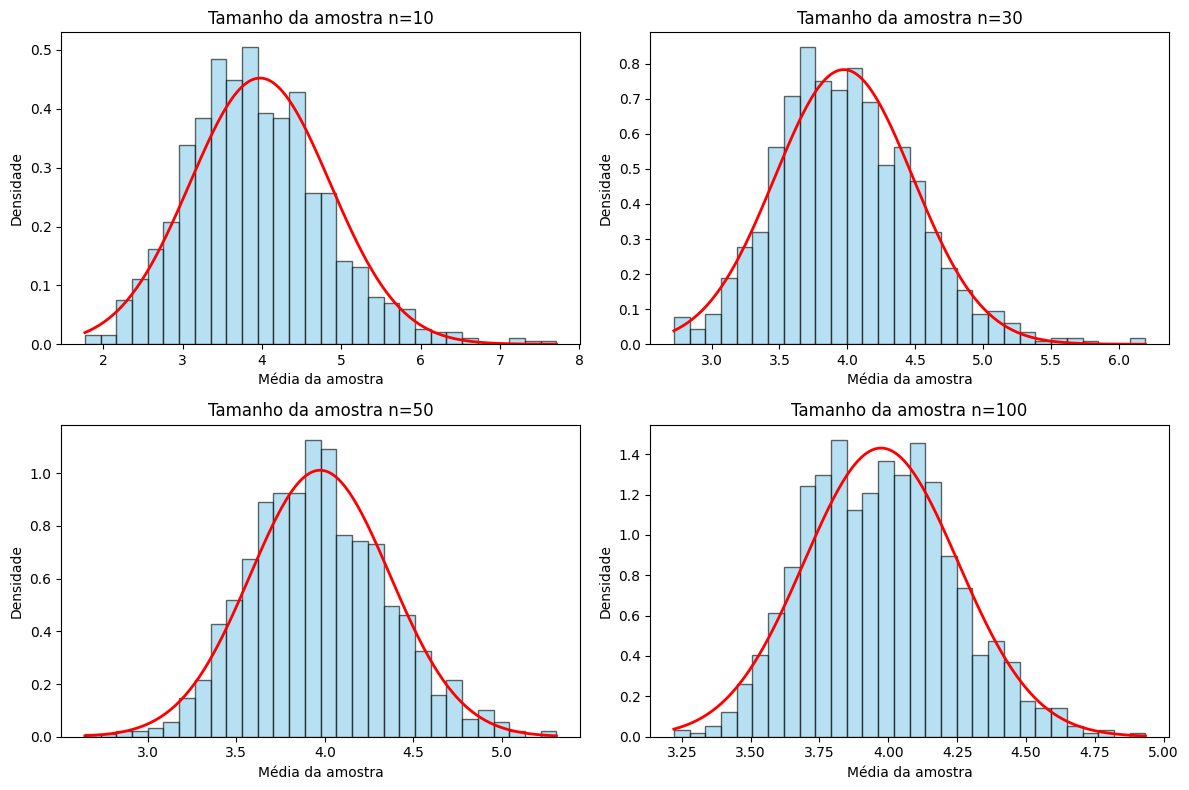

In [14]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

#Parâmetros Gama
shape = 2
scale = 2
tamanho_populacao = 10000

populacao = gamma.rvs(a=shape, scale=scale, size=tamanho_populacao)

#Tamanho das Amostras
amostras_tamanhos = [10, 30, 50, 100]
numero_amostras = 1000

plt.figure(figsize=(12,8))

for i, n in enumerate(amostras_tamanhos, 1):
  medias_amostrais = [np.mean(np.random.choice(populacao, size=n, replace=False)) for _ in range(numero_amostras)]

  plt.subplot(2, 2, i)
  plt.hist(medias_amostrais, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')

  media = np.mean(populacao)
  sigma = np.std(populacao) / np.sqrt(n)
  x = np.linspace(min(medias_amostrais), max(medias_amostrais), 200)
  plt.plot(x, norm.pdf(x, media, sigma), 'r', linewidth=2)

  plt.title(f"Tamanho da amostra n={n}")
  plt.xlabel("Média da amostra")
  plt.ylabel("Densidade")

plt.tight_layout()
plt.show()

##C: p-value
##Faça um programa que mostra o passo a passo para calcular o p-value do evento abaixo. Coloque figuras para cada passo.

* O objetivo deste estudo foi avaliar se a observação de 1 caso vermelho em uma amostra de 5 elementos fornece evidência estatística suficiente para rejeitar a Hipótese Nula. A Hipótese Nula assume que a probabilidade de ocorrência de um prédio vermelho é de 50%, ou seja, que a seleção é aleatória e não enviesada.
* Os histogramas gerados demonstram que, sob Hipótese Nula, a distribuição é simétrica e centrada entre 2 e 3 sucessos. Se observa que os eventos mais prováveis são obter 2 ou 3 casos vermelhos. O evento observado, destacado em vermelho nos gráficos, embora menos frequente que a média, ainda se encontra em uma região de densidade relevante da distribuição, e não em uma cauda extrema. Isso sugere que o resultado é perfeitamente compatível com a variabilidade natural do acaso.

* P-value unilateral inferior: aproximadamente 0.1875 (18,75%), indica que existe cerca de 18,75% de chance de observar 1 ou menos prédios vermelhos se a Hipótese Nula for verdadeira.

* P-value unilateral superior: aproximadamente 0.96875 (96,88%), como o valor é próximo de 97%, isso mostra que obter “pelo menos um” prédio vermelho é um evento extremamente comum.

* P-value bilateral: aproximadamente 0.375 (37,5%), representa a probabilidade de observar um desvio tão ou mais extremo que o atual (tanto para menos quanto para mais vermelhos).

* Como o p-value (≈0.375) é maior que 0.05, falhamos em rejeitar a hipótese nula. Não há evidência estatística para afirmar que o processo é enviesado ou diferente de uma seleção aleatória com probabilidade de 50%. A ocorrência de apenas 1 prédio vermelho em uma amostra de 5 é um resultado totalmente esperado dentro da variabilidade natural desse processo de amostragem.

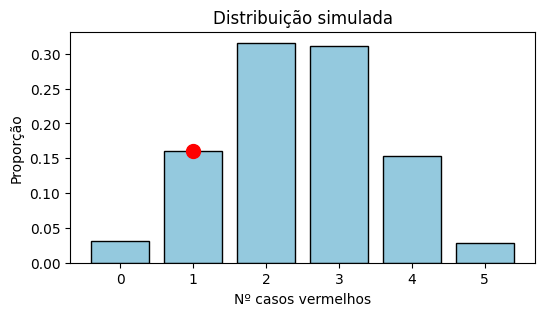

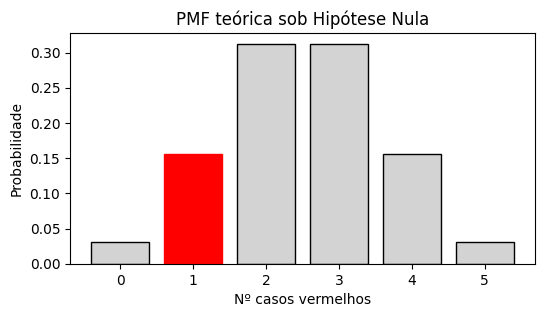

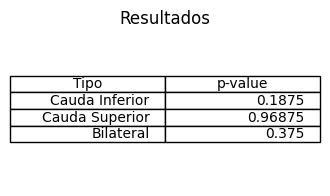

In [16]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from scipy.stats import binom, binomtest

#Parâmetros
tamanho_amostra = 5
vermelhos = 1
hip_nula = 0.5
num_simulacao = 10000
np.random.seed(42)

simulacao = np.random.binomial(tamanho_amostra, hip_nula, size=num_simulacao)

valores = np.arange(0, tamanho_amostra+1)
freqs = np.bincount(simulacao, minlength=tamanho_amostra+1)/num_simulacao

pmf = binom.pmf(valores, tamanho_amostra, hip_nula)

#p-values
cauda_inferior = binom.cdf(vermelhos, tamanho_amostra, hip_nula)

cauda_superior = 1 - binom.cdf(vermelhos - 1, tamanho_amostra, hip_nula)

bilateral = binomtest(vermelhos, tamanho_amostra, hip_nula, alternative="two-sided").pvalue

plt.figure(figsize=(6,3))
sb.barplot(x=valores, y=freqs, color='skyblue', edgecolor='black')
plt.scatter([vermelhos], [freqs[vermelhos]], color='red', s=100)
plt.title("Distribuição simulada")
plt.xlabel("Nº casos vermelhos")
plt.ylabel("Proporção")
plt.show()

plt.figure(figsize=(6,3))
barras = plt.bar(valores, pmf, color='lightgray', edgecolor='black')
barras[vermelhos].set_color('red')
plt.title("PMF teórica sob Hipótese Nula")
plt.xlabel("Nº casos vermelhos")
plt.ylabel("Probabilidade")
plt.show()

df = pd.DataFrame({"Tipo" : ["Cauda Inferior", "Cauda Superior", "Bilateral"], "p-value" : [cauda_inferior, cauda_superior, bilateral]})

plt.figure(figsize=(4,2))
plt.axis('off')
plt.table(cellText=df.values, colLabels=df.columns, loc='center')
plt.title("Resultados")
plt.show()

##D: p-value
##Crie duas Gaussianas como mostrado abaixo (é só variar a média). Sortei 100 sequências de três valores na azul e para cada sequência calcule o p-value a partir da vermelha. Veja a seta vermelha que indica a partir de qual amostra é calculado p-value. Calcule a taxa de falso negativos (p-value acima de 5%).